In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [27]:
import warnings

warnings.filterwarnings("ignore")

In [28]:
_FILE_PATH = '../../data/processed/merged_data_2019_2022.csv'
data = pd.read_csv(_FILE_PATH)

In [29]:
X = data.drop(columns=['grav'])
y = data['grav']


In [30]:
# Imputation des valeurs manquantes
from sklearn.impute import SimpleImputer

_NUMERICAL_TYPES= ['int64', 'float64']
_CATEGORICAL_TYPES= ['object', 'category']
_REPLACE_VALUE_NUM= -1
_REPLACE_VALUE_CAT= "-1"
_REPLACE_NUM_STRATEGY= "mean"
_REPLACE_CAT_STRATEGY= "most_frequent"

# Identifier les colonnes numériques et catégoriques
numerical_columns = X.select_dtypes(include=_NUMERICAL_TYPES).columns.tolist()
categorical_columns = X.select_dtypes(include=_CATEGORICAL_TYPES).columns.tolist()

X[categorical_columns] = X[categorical_columns].astype(str)

# Remplacer les valeurs spécifiques par NaN
X[numerical_columns] = X[numerical_columns].replace(_REPLACE_VALUE_NUM, np.nan)
X[categorical_columns] = X[categorical_columns].replace(_REPLACE_VALUE_CAT, np.nan)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation des colonnes numériques
imputer_num = SimpleImputer(strategy=_REPLACE_NUM_STRATEGY)
X_train[numerical_columns] = imputer_num.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = imputer_num.transform(X_test[numerical_columns])

# Imputation des colonnes catégoriques
imputer_cat = SimpleImputer(strategy=_REPLACE_CAT_STRATEGY)
X_train[categorical_columns] = imputer_cat.fit_transform(X_train[categorical_columns])
X_test[categorical_columns] = imputer_cat.transform(X_test[categorical_columns])

In [31]:
# vérifier l'imputation
dict_datas = {"X": X,
             "X_train": X_train,
             "X_test": X_test}
for name, data in dict_datas.items():
    numerical_neg1 = data[numerical_columns] == -1
    categorical_neg1 = data[categorical_columns] == "-1"
    print(f'{name}-numerical_neg_count:{numerical_neg1.any().sum()}categorical_neg_count:{categorical_neg1.any().sum()}')

X-numerical_neg_count:0categorical_neg_count:0
X_train-numerical_neg_count:0categorical_neg_count:0
X_test-numerical_neg_count:0categorical_neg_count:0


In [32]:
# Encodage
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

_ONEHOT_DROP = "first"

pd.set_option('display.max_columns', None)

# Encodage
scaler_minmax = MinMaxScaler()
X_train[numerical_columns] = scaler_minmax.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler_minmax.transform(X_test[numerical_columns])

scaler_onehot = OneHotEncoder(handle_unknown='ignore', drop=_ONEHOT_DROP)
encoded_train_categorical = scaler_onehot.fit_transform(X_train[categorical_columns]).toarray()
encoded_test_categorical = scaler_onehot.transform(X_test[categorical_columns]).toarray()

# Création de DataFrames avec les colonnes encodées
encoded_train_categorical_df = pd.DataFrame(
    encoded_train_categorical,
    columns=scaler_onehot.get_feature_names_out(categorical_columns),
    index=X_train.index
)

encoded_test_categorical_df = pd.DataFrame(
    encoded_test_categorical,
    columns=scaler_onehot.get_feature_names_out(categorical_columns),
    index=X_test.index
)

X_train = pd.concat([X_train.drop(columns=categorical_columns), encoded_train_categorical_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_columns), encoded_test_categorical_df], axis=1)

print("X_train :")
display(X_train.head())
print("X_test :")
display(X_test.head())

X_train :


,an_nais,jour,mois,an,agg,vma,nb_v,nb_u,imply_cycle_edp,imply_2rm,imply_vl,imply_pl,age,hr,tpc,has_ceinture,has_gants,has_casque,has_airbag,has_gilet,has_de,choc_avant,choc_arriere,choc_gauche,choc_droit,place_passager,place_passager_avant,place_pieton,catu_pieton,sexe_masculin,trajet_domicile,trajet_personnelle,trajet_professionnelle,locp_chaussee,locp_sans,actp_axe,actp_sans_objet,actp_traverse,catv_cycle_edp,catv_pl,catv_vl,obs_naturel,obs_structurel,obsm_autre,obsm_pieton,obsm_vehicule,manv_atypique,manv_changement_dir,manv_ligne_droite,manv_particuliere,lum_jour,lum_nocturne,int_complexe,int_simple,atm_normale,atm_pluvieuses,col_deux_vl,col_sans_collision,catr_route_principale,catr_route_secondaire,catr_route_urbaine,circ_simple,vosp_sans,prof_plat,plan_rectiligne,surf_humide,surf_normale,infra_routiers,infra_zones,situ_particuliere,jour_semaine_Monday,jour_semaine_Saturday,jour_semaine_Sunday,jour_semaine_Thursday,jour_semaine_Tuesday,jour_semaine_Wednesday,reg_Bourgogne-Franche-Comté,reg_Bretagne,reg_Centre-Val de Loire,reg_Corse,reg_Grand Est,reg_Guadeloupe,reg_Guyane,reg_Hauts-de-France,reg_Ile-de-France,reg_La Réunion,reg_Martinique,reg_Mayotte,reg_Normandie,reg_Nouvelle-Aquitaine,reg_Nouvelle-Calédonie,reg_Occitanie,reg_Pays de la Loire,reg_Polynésie Française,reg_Provence-Alpes-Côte d'Azur,reg_Saint-Barthélemy,reg_Saint-Martin,reg_Saint-Pierre-et-Miquelon,reg_Wallis-et-Futuna
305740,0.758929,0.433333,1.000000,0.000000,1.0,0.384615,0.083333,0.052632,0.0,0.0,1.0,0.0,0.218182,0.260870,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147268,0.553571,0.833333,0.545455,1.000000,1.0,0.538462,0.041667,0.026316,0.0,0.0,1.0,0.0,0.454545,0.695652,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
322880,0.508929,0.966667,0.727273,0.000000,1.0,0.230769,0.000000,0.026316,0.0,0.0,1.0,0.0,0.472727,0.391304,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303059,0.821429,0.066667,0.727273,0.000000,1.0,0.384615,0.041667,0.026316,0.0,0.0,1.0,0.0,0.154545,0.782609,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
462750,0.419643,0.633333,0.272727,0.666667,1.0,0.384615,0.041667,0.026316,0.0,0.0,0.0,1.0,0.581818,0.739130,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


X_test :


,an_nais,jour,mois,an,agg,vma,nb_v,nb_u,imply_cycle_edp,imply_2rm,imply_vl,imply_pl,age,hr,tpc,has_ceinture,has_gants,has_casque,has_airbag,has_gilet,has_de,choc_avant,choc_arriere,choc_gauche,choc_droit,place_passager,place_passager_avant,place_pieton,catu_pieton,sexe_masculin,trajet_domicile,trajet_personnelle,trajet_professionnelle,locp_chaussee,locp_sans,actp_axe,actp_sans_objet,actp_traverse,catv_cycle_edp,catv_pl,catv_vl,obs_naturel,obs_structurel,obsm_autre,obsm_pieton,obsm_vehicule,manv_atypique,manv_changement_dir,manv_ligne_droite,manv_particuliere,lum_jour,lum_nocturne,int_complexe,int_simple,atm_normale,atm_pluvieuses,col_deux_vl,col_sans_collision,catr_route_principale,catr_route_secondaire,catr_route_urbaine,circ_simple,vosp_sans,prof_plat,plan_rectiligne,surf_humide,surf_normale,infra_routiers,infra_zones,situ_particuliere,jour_semaine_Monday,jour_semaine_Saturday,jour_semaine_Sunday,jour_semaine_Thursday,jour_semaine_Tuesday,jour_semaine_Wednesday,reg_Bourgogne-Franche-Comté,reg_Bretagne,reg_Centre-Val de Loire,reg_Corse,reg_Grand Est,reg_Guadeloupe,reg_Guyane,reg_Hauts-de-France,reg_Ile-de-France,reg_La Réunion,reg_Martinique,reg_Mayotte,reg_Normandie,reg_Nouvelle-Aquitaine,reg_Nouvelle-Calédonie,reg_Occitanie,reg_Pays de la Loire,reg_Polynésie Française,reg_Provence-Alpes-Côte d'Azur,reg_Saint-Barthélemy,reg_Saint-Martin,reg_Saint-Pierre-et-Miquelon,reg_Wallis-et-Futuna
161536,0.687500,0.433333,1.000000,1.000000,1.0,0.384615,0.041667,0.078947,0.0,0.0,1.0,0.0,0.318182,0.521739,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134814,0.580357,0.533333,0.181818,1.000000,1.0,0.384615,0.041667,0.026316,0.0,0.0,1.0,0.0,0.427273,0.347826,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409695,0.258929,0.166667,0.727273,0.666667,1.0,0.384615,0.041667,0.026316,0.0,0.0,1.0,0.0,0.745455,0.521739,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400278,0.750000,0.900000,0.727273,0.666667,1.0,0.384615,0.041667,0.026316,0.0,1.0,0.0,0.0,0.245455,0.347826,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420627,0.339286,0.066667,0.636364,0.666667,0.0,0.538462,0.041667,0.026316,0.0,0.0,0.0,1.0,0.663636,0.434783,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
X_train.shape
X_test.shape

(98447, 99)

FEATURE SELECTION

variance treshold pour retirer les colonnes dont la variance est faible
Colonnes supprimées : ['nb_v', 'nb_u', 'tpc', 'has_de', 'actp_axe', 'reg_Guadeloupe', 'reg_Guyane', 'reg_Martinique', 'reg_Mayotte', 'reg_Nouvelle-Calédonie', 'reg_Polynésie Française', 'reg_Saint-Barthélemy', 'reg_Saint-Martin', 'reg_Saint-Pierre-et-Miquelon', 'reg_Wallis-et-Futuna']

on vérifie les features les plus corrélées avec la variable cible, mais on ne va pas supprimer 


In [34]:
# Feature selection avec variance treshold
from sklearn.feature_selection import VarianceThreshold

_VARIANCE_TRESHOLD = 0.01

variance_threshold = VarianceThreshold(threshold=_VARIANCE_TRESHOLD)

X_train_filtered = variance_threshold.fit_transform(X_train)
X_test_filtered = variance_threshold.transform(X_test)

# Obtenir les colonnes sélectionnées
selected_columns = X_train.columns[variance_threshold.get_support()]

# Convertir les résultats en DataFrame avec les colonnes sélectionnées
X_train_filtered = pd.DataFrame(X_train_filtered, columns=selected_columns, index=X_train.index)
X_test_filtered = pd.DataFrame(X_test_filtered, columns=selected_columns, index=X_test.index)

# Afficher les résultats pour vérification
removed_columns = X_train.columns[~variance_threshold.get_support()]
print("VarianceTreshold - Colonnes supprimées :", removed_columns.tolist())


VarianceTreshold - Colonnes supprimées : ['nb_v', 'nb_u', 'tpc', 'has_de', 'actp_axe', 'reg_Guadeloupe', 'reg_Guyane', 'reg_Martinique', 'reg_Mayotte', 'reg_Nouvelle-Calédonie', 'reg_Polynésie Française', 'reg_Saint-Barthélemy', 'reg_Saint-Martin', 'reg_Saint-Pierre-et-Miquelon', 'reg_Wallis-et-Futuna']


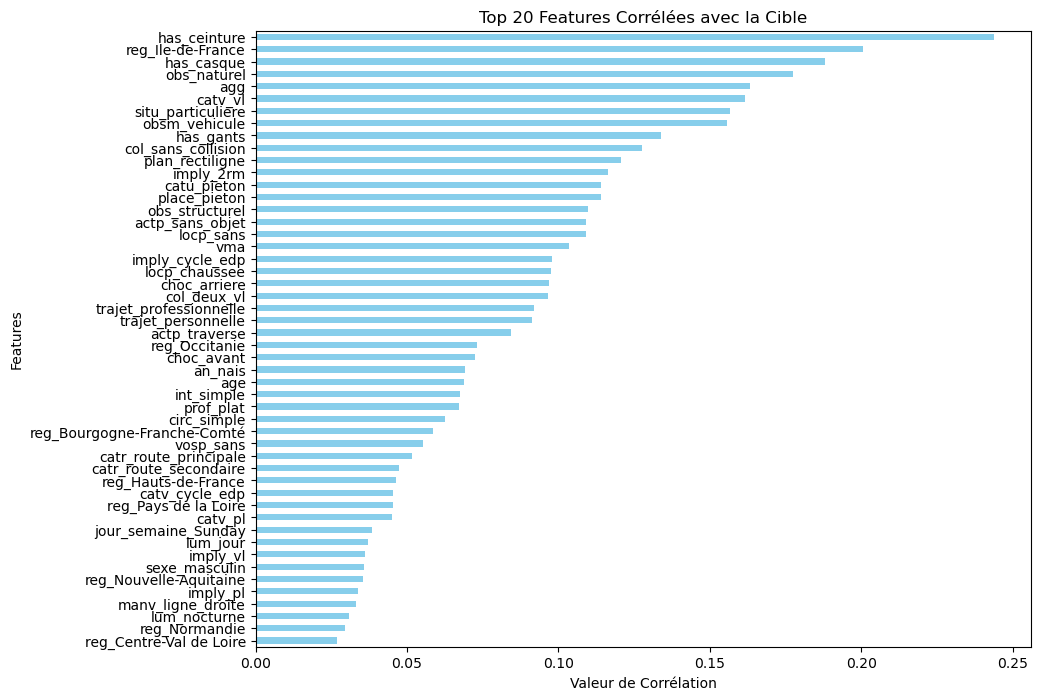

In [35]:
# Visualisation des features les plus corrélées avec y

pd.set_option('display.max_rows', None)
# Calcul de la corrélation avec la cible
correlations = X_train_filtered.corrwith(y_train)
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Visualiser les 20 features les plus corrélées
top_n = 50
sorted_correlations.head(top_n).plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title("Top 20 Features Corrélées avec la Cible")
plt.xlabel("Valeur de Corrélation")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()



In [36]:
# Reequilibrer les classes

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_ru, y_ru = rus.fit_resample(X_train_filtered, y_train)

# verifier
y_ru.value_counts()

grav
0    70953
1    70953
Name: count, dtype: int64

In [37]:
# PCA
from sklearn.decomposition import PCA
import plotly.express as px


_SAMPLE_SIZE_PCA3D = int(X_ru.shape[0]/4)

sample_indices = np.random.choice(X_ru.index, size=_SAMPLE_SIZE_PCA3D, replace=False)
X_sample = X_ru.loc[sample_indices]
y_sample = y_ru.loc[sample_indices]

pca = PCA(n_components= 3)
data_3D = pca.fit_transform(X_sample)

# Visualisation interactive avec Plotly

pca_df = pd.DataFrame(data_3D, columns=['PC1', 'PC2', 'PC3'])
pca_df['Label'] = y_sample.values

fig = px.scatter_3d(
    pca_df,
    x='PC1', y='PC2', z='PC3',
    color='Label',
    title=f'PCA - sample={y_sample.shape[0]}, variance_expliquee={round(pca.explained_variance_ratio_.sum(),2)}',
    labels={'PC1': 'Composante principale 1', 'PC2': 'Composante principale 2', 'PC3': 'Composante principale 3'},
    opacity=0.5
)


fig.update_traces(marker=dict(size=5))
fig.update_layout(
    scene=dict(
        xaxis_title='Composante principale 1',
        yaxis_title='Composante principale 2',
        zaxis_title='Composante principale 3'
    ),
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.write_html("pca_3d_plot.html")


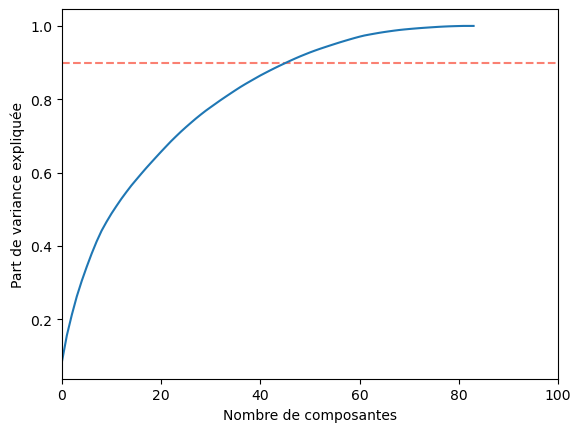

Nombre de composantes retenues : 47


In [38]:
pca = PCA()
pca.fit(X_ru)

plt.figure()
plt.xlim(0,100)
plt.xlabel('Nombre de composantes')
plt.ylabel('Part de variance expliquée')
plt.axhline(y = 0.9, color ='salmon', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());
plt.show();

pca = PCA(n_components = 0.9)
pca.fit(X_ru)
print("Nombre de composantes retenues :", pca.n_components_)

In [39]:
X_ru.columns

Index(['an_nais', 'jour', 'mois', 'an', 'agg', 'vma', 'imply_cycle_edp',
       'imply_2rm', 'imply_vl', 'imply_pl', 'age', 'hr', 'has_ceinture',
       'has_gants', 'has_casque', 'has_airbag', 'has_gilet', 'choc_avant',
       'choc_arriere', 'choc_gauche', 'choc_droit', 'place_passager',
       'place_passager_avant', 'place_pieton', 'catu_pieton', 'sexe_masculin',
       'trajet_domicile', 'trajet_personnelle', 'trajet_professionnelle',
       'locp_chaussee', 'locp_sans', 'actp_sans_objet', 'actp_traverse',
       'catv_cycle_edp', 'catv_pl', 'catv_vl', 'obs_naturel', 'obs_structurel',
       'obsm_autre', 'obsm_pieton', 'obsm_vehicule', 'manv_atypique',
       'manv_changement_dir', 'manv_ligne_droite', 'manv_particuliere',
       'lum_jour', 'lum_nocturne', 'int_complexe', 'int_simple', 'atm_normale',
       'atm_pluvieuses', 'col_deux_vl', 'col_sans_collision',
       'catr_route_principale', 'catr_route_secondaire', 'catr_route_urbaine',
       'circ_simple', 'vosp_sans', 'prof

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

def check_result(X, y, X_test, y_test):
    clf = RandomForestClassifier(n_jobs=-1, random_state=42)
    clf.fit(X,y)
    clf_score = clf.score(X_test, y_test) # a return

    y_pred = clf.predict(X_test)
    clf_report = classification_report(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    return clf.classes_, clf_score, clf_report, cm

In [41]:
def print_result(clf_classes, score, report, cm):
    print(f'Score: {score:.2f}')
    print(report)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_classes)
    disp.plot(cmap='Blues')
    plt.title('Matrice de confusion')
    plt.show()

Score: 0.76
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     80517
           1       0.42      0.82      0.56     17930

    accuracy                           0.76     98447
   macro avg       0.68      0.78      0.70     98447
weighted avg       0.85      0.76      0.79     98447



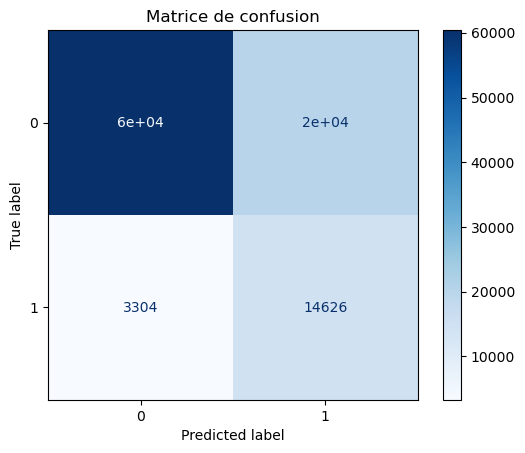

In [42]:
# avec pca

X_train_pca = pca.fit_transform(X_ru)
X_test_pca = pca.transform(X_test_filtered)

clf_classes, score, report, cm = check_result(X_train_pca, y_ru, X_test_pca, y_test)
print_result(clf_classes, score, report, cm)

Score: 0.69
              precision    recall  f1-score   support

           0       0.91      0.69      0.79     80517
           1       0.33      0.69      0.45     17930

    accuracy                           0.69     98447
   macro avg       0.62      0.69      0.62     98447
weighted avg       0.81      0.69      0.72     98447



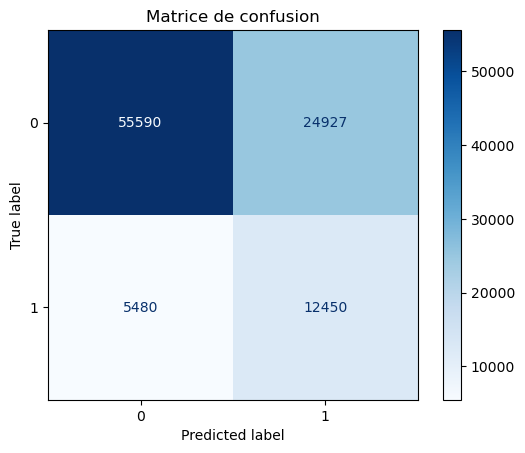

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


lda = LDA()
X_train_lda = lda.fit_transform(X_ru, y_ru)
X_test_lda = lda.transform(X_test_filtered)

clf_classes, score, report, cm = check_result(X_train_lda, y_ru, X_test_lda, y_test)
print_result(clf_classes, score, report, cm)

Score: 0.78
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     80517
           1       0.44      0.84      0.58     17930

    accuracy                           0.78     98447
   macro avg       0.70      0.80      0.71     98447
weighted avg       0.86      0.78      0.80     98447



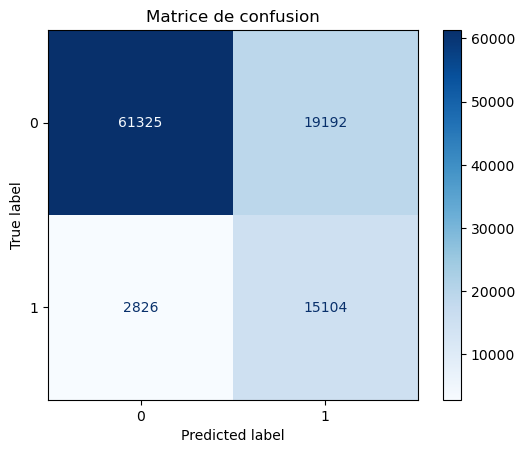

In [44]:
# basique
clf_classes, score, report, cm = check_result(X_ru, y_ru, X_test_filtered, y_test)
print_result(clf_classes, score, report, cm)

On observe que pca est plutôt efficace pour garder des résultats très corrects

Score: 0.74
              precision    recall  f1-score   support

           0       0.89      0.77      0.83     80517
           1       0.36      0.58      0.45     17930

    accuracy                           0.74     98447
   macro avg       0.63      0.68      0.64     98447
weighted avg       0.80      0.74      0.76     98447



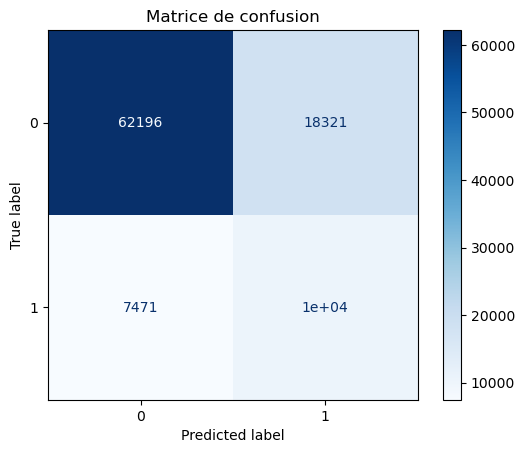

In [45]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf_dt.fit(X_train_pca, y_ru)

y_pred = clf_dt.predict(X_test_pca)
print_result(clf_dt.classes_, clf_dt.score(X_test_pca, y_test), classification_report(y_test, y_pred), confusion_matrix(y_test, y_pred))

Score: 0.74
              precision    recall  f1-score   support

           0       0.94      0.72      0.82     80517
           1       0.39      0.79      0.52     17930

    accuracy                           0.74     98447
   macro avg       0.66      0.76      0.67     98447
weighted avg       0.84      0.74      0.76     98447



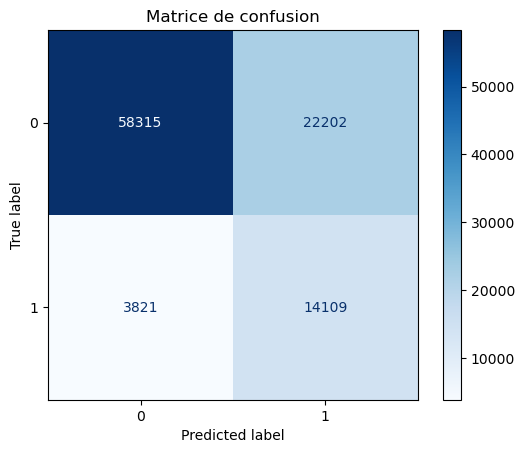

In [46]:
from sklearn.ensemble import AdaBoostClassifier

ac = AdaBoostClassifier(estimator=clf_dt, n_estimators=50)
ac.fit(X_train_pca, y_ru)

y_pred = ac.predict(X_test_pca)
print_result(ac.classes_, ac.score(X_test_pca, y_test), classification_report(y_test, y_pred), confusion_matrix(y_test, y_pred))

[0]	train-logloss:0.66133	validation-logloss:0.66170
[1]	train-logloss:0.63529	validation-logloss:0.63594
[2]	train-logloss:0.61292	validation-logloss:0.61386
[3]	train-logloss:0.59445	validation-logloss:0.59554
[4]	train-logloss:0.57832	validation-logloss:0.57960
[5]	train-logloss:0.56427	validation-logloss:0.56576
[6]	train-logloss:0.55250	validation-logloss:0.55436
[7]	train-logloss:0.54143	validation-logloss:0.54362
[8]	train-logloss:0.53268	validation-logloss:0.53507
[9]	train-logloss:0.52456	validation-logloss:0.52716
[10]	train-logloss:0.51761	validation-logloss:0.52045
[11]	train-logloss:0.51153	validation-logloss:0.51458
[12]	train-logloss:0.50550	validation-logloss:0.50885
[13]	train-logloss:0.50071	validation-logloss:0.50427
[14]	train-logloss:0.49612	validation-logloss:0.49977
[15]	train-logloss:0.49147	validation-logloss:0.49535
[16]	train-logloss:0.48728	validation-logloss:0.49140
[17]	train-logloss:0.48386	validation-logloss:0.48809
[18]	train-logloss:0.48060	validation-

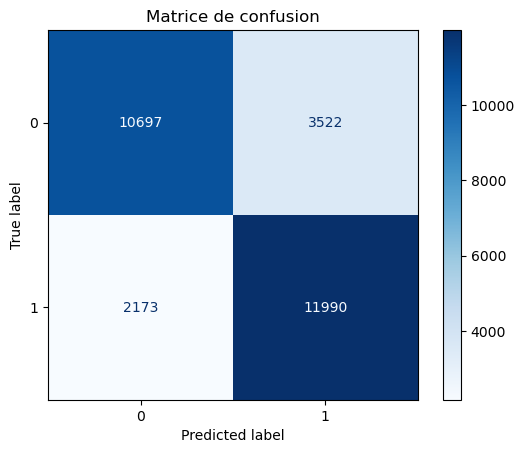

In [47]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X_ru, y_ru, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

train = xgb.DMatrix(data=X_train, label=y_train)
val = xgb.DMatrix(data=X_val, label=y_val)
test = xgb.DMatrix(data=X_test, label=y_test)
# DATA LEAK


params = {'booster': 'gbtree', 'learning_rate': 0.1, 'objective': 'binary:logistic'}
eval_set = [(train, 'train'), (val, 'validation')]
xgboost = xgb.train(params=params, dtrain=train, num_boost_round=300, evals=eval_set, early_stopping_rounds=15)

y_pred = xgboost.predict(test)
y_pred_labels = (y_pred >= 0.5).astype(int)

# Calcul des métriques
score = (y_pred_labels == y_test).mean()
report = classification_report(y_test, y_pred_labels)
cm = confusion_matrix(y_test, y_pred_labels)

print_result(clf_classes=[0, 1], score=score, report=report, cm=cm)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Résultats globaux de la validation croisée stratifiée :
Score: 0.80
Classification Report (moyenne sur les folds) :
Classe 0:
  precision: 0.83
  recall: 0.76
  f1-score: 0.79
  support: 14190.60
Classe 1:
  precision: 0.78
  recall: 0.84
  f1-score: 0.81
  support: 14190.60
accuracy: 0.80
Classe macro avg:
  precision: 0.80
  recall: 0.80
  f1-score: 0.80
  support: 28381.20
Classe weighted avg:
  precision: 0.80
  recall: 0.80
  f1-score: 0.80
  support: 28381.20



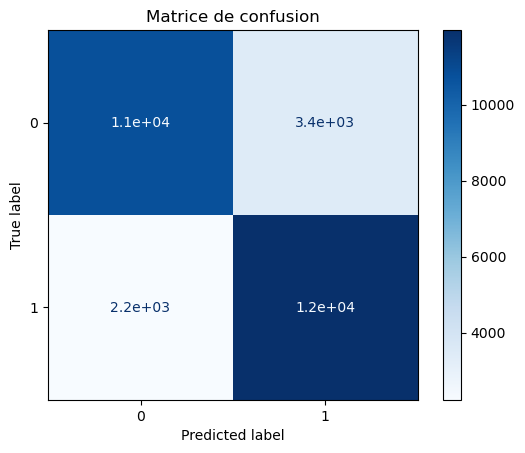

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import numpy as np

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

params = {
    'booster': 'gbtree',
    'learning_rate': 0.1,
    'objective': 'binary:logistic'
}

accuracy_scores = []
confusion_matrices = []
reports = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_ru, y_ru)):
    print(f"Fold {fold + 1}/{n_splits}")
    
    X_train, X_val = X_ru.iloc[train_idx], X_ru.iloc[val_idx]
    y_train, y_val = y_ru.iloc[train_idx], y_ru.iloc[val_idx]
    
    train = xgb.DMatrix(data=X_train, label=y_train)
    val = xgb.DMatrix(data=X_val, label=y_val)
    
    eval_set = [(train, 'train'), (val, 'validation')]
    model = xgb.train(params=params, dtrain=train, num_boost_round=300, evals=eval_set, early_stopping_rounds=15, verbose_eval=False)
    
    y_pred = model.predict(val)
    y_pred_labels = (y_pred >= 0.5).astype(int)
    
    accuracy = (y_pred_labels == y_val).mean()
    cm = confusion_matrix(y_val, y_pred_labels)
    report = classification_report(y_val, y_pred_labels, output_dict=True)
    
    accuracy_scores.append(accuracy)
    confusion_matrices.append(cm)
    reports.append(report)

# Calcul des moyennes globales
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_cm = np.mean(confusion_matrices, axis=0)

# Calcul du rapport moyen
mean_report = {}
for key in reports[0]:
    if isinstance(reports[0][key], dict):
        mean_report[key] = {metric: np.mean([report[key][metric] for report in reports if key in report])
                            for metric in reports[0][key]}
    else:
        mean_report[key] = np.mean([report[key] for report in reports if key in report])

# Conversion du rapport moyen en texte
report_text = "Classification Report (moyenne sur les folds) :\n"
for label, metrics in mean_report.items():
    if isinstance(metrics, dict):
        report_text += f"Classe {label}:\n"
        for metric, value in metrics.items():
            report_text += f"  {metric}: {value:.2f}\n"
    else:
        report_text += f"{label}: {metrics:.2f}\n"

print("Résultats globaux de la validation croisée stratifiée :")
print_result(clf_classes=[0, 1], score=mean_accuracy, report=report_text, cm=mean_cm)


In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import optuna
import xgboost as xgb
import numpy as np

def objective(trial):
    params = {
        'booster': 'gbtree',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'objective': 'binary:logistic',
        'eval_metric': 'logloss'
    }
    
    # Validation croisée
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in skf.split(X_ru, y_ru):
        X_train, X_val = X_ru.iloc[train_idx], X_ru.iloc[val_idx]
        y_train, y_val = y_ru.iloc[train_idx], y_ru.iloc[val_idx]
        
        model = xgb.XGBClassifier(**params, use_label_encoder=False)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_val)
        scores.append(accuracy_score(y_val, y_pred))
    
    return np.mean(scores)

# Optimisation avec Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Meilleurs paramètres :", study.best_params)


[I 2025-01-28 12:35:06,210] A new study created in memory with name: no-name-a98eb438-e434-4170-929e-22e051cf0589
[I 2025-01-28 12:35:12,110] Trial 0 finished with value: 0.7913478087637602 and parameters: {'learning_rate': 0.09768551895367547, 'max_depth': 4, 'subsample': 0.7655964999847124, 'colsample_bytree': 0.8874723576213703, 'n_estimators': 99}. Best is trial 0 with value: 0.7913478087637602.
[I 2025-01-28 12:35:26,559] Trial 1 finished with value: 0.800706115036934 and parameters: {'learning_rate': 0.09716962975328246, 'max_depth': 7, 'subsample': 0.862246205741857, 'colsample_bytree': 0.8726962142512351, 'n_estimators': 208}. Best is trial 1 with value: 0.800706115036934.
[I 2025-01-28 12:35:35,644] Trial 2 finished with value: 0.798725940108106 and parameters: {'learning_rate': 0.2831243970735428, 'max_depth': 5, 'subsample': 0.8658519006024333, 'colsample_bytree': 0.8312516227719651, 'n_estimators': 168}. Best is trial 1 with value: 0.800706115036934.
[I 2025-01-28 12:35:53,

Meilleurs paramètres : {'learning_rate': 0.07065882612141479, 'max_depth': 9, 'subsample': 0.8299761710881864, 'colsample_bytree': 0.8162632660145376, 'n_estimators': 216}


Fold 1/5
Fold 1 AUC: 0.88
Fold 2/5
Fold 2 AUC: 0.88
Fold 3/5
Fold 3 AUC: 0.89
Fold 4/5
Fold 4 AUC: 0.88
Fold 5/5
Fold 5 AUC: 0.88


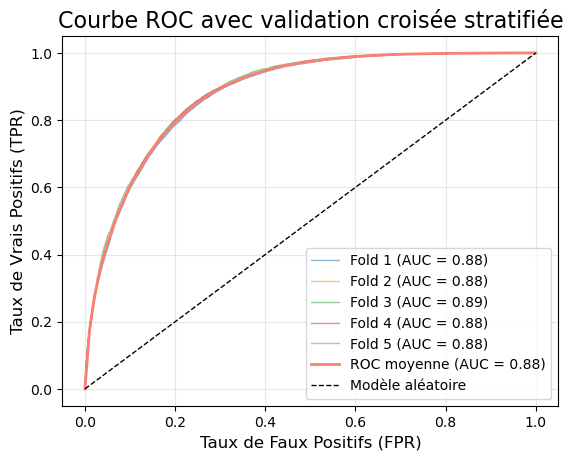

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

params = study.best_params
params.update({'objective': 'binary:logistic', 'random_state': 42, 'eval_metric': 'logloss'})

accuracy_scores = []
confusion_matrices = []
reports = []
all_fpr = []  # Pour la courbe ROC individuelle
all_tpr = []  # Pour la courbe ROC moyenne

mean_fpr = np.linspace(0, 1, 100)  # Points de référence pour interpoler les courbes ROC

for fold, (train_idx, val_idx) in enumerate(skf.split(X_ru, y_ru)):
    print(f"Fold {fold + 1}/{n_splits}")
    
    X_train, X_val = X_ru.iloc[train_idx], X_ru.iloc[val_idx]
    y_train, y_val = y_ru.iloc[train_idx], y_ru.iloc[val_idx]
    
    train = xgb.DMatrix(data=X_train, label=y_train)
    val = xgb.DMatrix(data=X_val, label=y_val)
    
    eval_set = [(train, 'train'), (val, 'validation')]
    model = xgb.train(params=params, dtrain=train, num_boost_round=300, evals=eval_set, early_stopping_rounds=15, verbose_eval=False)
    
    y_pred = model.predict(val) 
    y_pred_labels = (y_pred >= 0.5).astype(int)
    
    # Calcul des métriques
    accuracy = (y_pred_labels == y_val).mean()
    cm = confusion_matrix(y_val, y_pred_labels)
    report = classification_report(y_val, y_pred_labels, output_dict=True)
    
    accuracy_scores.append(accuracy)
    confusion_matrices.append(cm)
    reports.append(report)
    
    # Courbe Roc
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f"Fold {fold + 1} AUC: {roc_auc:.2f}")
    
    all_tpr.append(np.interp(mean_fpr, fpr, tpr))
    all_tpr[-1][0] = 0.0

    # Ajouter les courbes individuelles pour les tracer
    plt.plot(fpr, tpr, lw=1, alpha=0.5, label=f"Fold {fold + 1} (AUC = {roc_auc:.2f})")

# Moyenne des courbes ROC
mean_tpr = np.mean(all_tpr, axis=0)
mean_tpr[-1] = 1.0  # Assurer que le dernier point atteint TPR = 1
mean_auc = auc(mean_fpr, mean_tpr)

# Courbe Roc Moyenne
plt.plot(mean_fpr, mean_tpr, color='salmon', lw=2, label=f"ROC moyenne (AUC = {mean_auc:.2f})")

# Diagonale de base
plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Modèle aléatoire")

plt.title("Courbe ROC avec validation croisée stratifiée", fontsize=16)
plt.xlabel("Taux de Faux Positifs (FPR)", fontsize=12)
plt.ylabel("Taux de Vrais Positifs (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
